C:\Users\vinee\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 15s 32ms/step - accuracy: 0.7858 - loss: 0.7270 - val_accuracy: 0.9595 - val_loss: 0.1335
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 21s 32ms/step - accuracy: 0.9697 - loss: 0.0974 - val_accuracy: 0.9720 - val_loss: 0.0884
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 25ms/step - accuracy: 0.9806 - loss: 0.0611 - val_accuracy: 0.9715 - val_loss: 0.0920
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 30ms/step - accuracy: 0.9911 - loss: 0.0340 - val_accuracy: 0.9675 - val_loss: 0.0911
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 26ms/step - accuracy: 0.9926 - loss: 0.0221 - val_accuracy: 0.9670 - val_loss: 0.0973
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 29ms/step - accuracy: 0.9926 - loss: 0.0219 - val_accuracy: 0.9770 - val_loss: 0.0803
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 20s 26ms/step - accuracy: 0.9949 - loss: 0.0139 - val_accuracy: 0.9720 - val_loss: 0.0900
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.9963 - loss: 0.0131 - v

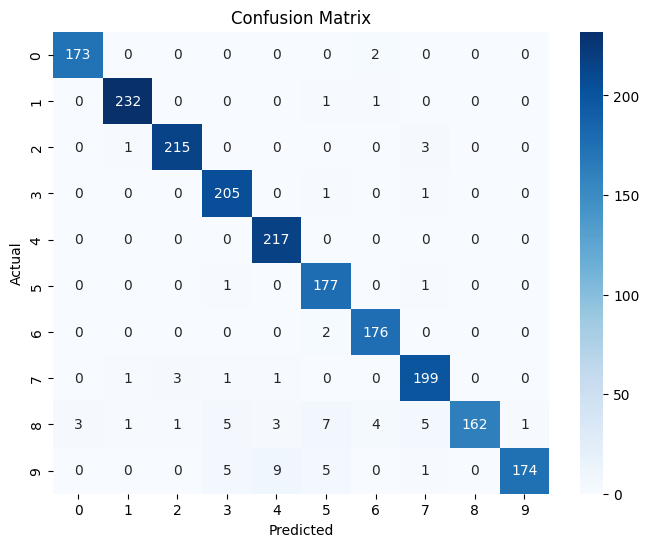

              precision    recall  f1-score   support

           0       0.98      0.99      0.99       175
           1       0.99      0.99      0.99       234
           2       0.98      0.98      0.98       219
           3       0.94      0.99      0.97       207
           4       0.94      1.00      0.97       217
           5       0.92      0.99      0.95       179
           6       0.96      0.99      0.98       178
           7       0.95      0.97      0.96       205
           8       1.00      0.84      0.92       192
           9       0.99      0.90      0.94       194

    accuracy                           0.96      2000
   macro avg       0.97      0.96      0.96      2000
weighted avg       0.97      0.96      0.96      2000



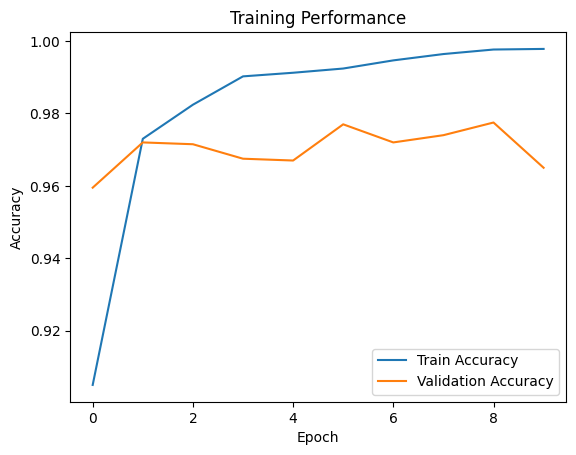

In [1]:
import tensorflow as tf 
from tensorflow import keras 
import matplotlib.pyplot as plt 
import numpy as np 
from sklearn.metrics import confusion_matrix, classification_report 
import seaborn as sns

#Load MNIST dataset

(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

#Use a smaller subset for faster training

subset_ratio = 0.2  # Use only 20% of the data subset_size_train = int(len(x_train) * subset_ratio) subset_size_test = int(len(x_test) * subset_ratio)
subset_size_train = int(len(x_train) * subset_ratio)
subset_size_test = int(len(x_test) * subset_ratio)

x_train, y_train = x_train[:subset_size_train], y_train[:subset_size_train] 
x_test, y_test = x_test[:subset_size_test], y_test[:subset_size_test]

#Reshape data to add channel dimension

x_train = x_train.reshape(-1, 28, 28, 1) 
x_test = x_test.reshape(-1, 28, 28, 1)

#Normalize the data

x_train, x_test = x_train / 255.0, x_test / 255.0

#Define the CNN model

model = keras.Sequential([ keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)), keras.layers.MaxPooling2D((2, 2)), keras.layers.Conv2D(64, (3, 3), activation='relu'), keras.layers.MaxPooling2D((2, 2)), keras.layers.Flatten(), keras.layers.Dense(128, activation='relu'), keras.layers.Dense(10, activation='softmax') ])

#Compile the model

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

#Train the model

history = model.fit(x_train, y_train, epochs=10, validation_data=(x_test, y_test))

#Evaluate the model

test_loss, test_acc = model.evaluate(x_test, y_test) 
print(f"Test accuracy: {test_acc:.4f}")

#Generate predictions

y_pred = np.argmax(model.predict(x_test), axis=1)

#Compute confusion matrix

conf_matrix = confusion_matrix(y_test, y_pred) 

plt.figure(figsize=(8, 6)) 
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10)) 
plt.xlabel('Predicted') 
plt.ylabel('Actual') 
plt.title('Confusion Matrix') 
plt.show()

#Print classification report

print(classification_report(y_test, y_pred))

#Plot training history

plt.plot(history.history['accuracy'], label='Train Accuracy') 
plt.plot(history.history['val_accuracy'], label='Validation Accuracy') 
plt.xlabel('Epoch') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.title('Training Performance') 
plt.show()